In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

%matplotlib inline

In [188]:
df = pd.read_csv("data/train.csv")

/Users/chulgyukim/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


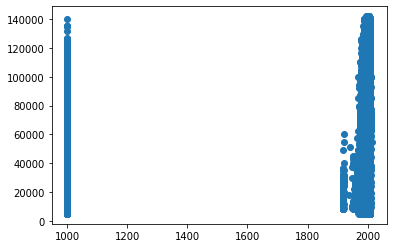

In [189]:
plt.scatter(df["YearMade"], df["SalePrice"])

In [190]:
df.head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
df.isnull().mean().round(2) * 100

SalesID                      0.0
SalePrice                    0.0
MachineID                    0.0
ModelID                      0.0
datasource                   0.0
auctioneerID                 5.0
YearMade                     0.0
MachineHoursCurrentMeter    64.0
UsageBand                   83.0
saledate                     0.0
fiModelDesc                  0.0
fiBaseModel                  0.0
fiSecondaryDesc             34.0
fiModelSeries               86.0
fiModelDescriptor           82.0
ProductSize                 53.0
fiProductClassDesc           0.0
state                        0.0
ProductGroup                 0.0
ProductGroupDesc             0.0
Drive_System                74.0
Enclosure                    0.0
Forks                       52.0
Pad_Type                    80.0
Ride_Control                63.0
Stick                       80.0
Transmission                54.0
Turbocharged                80.0
Blade_Extension             94.0
Blade_Width                 94.0
Enclosure_

In [192]:
df1 = df[df["YearMade"] >= 1940]

In [193]:
np.log(df["SalePrice"])

0         11.097410
1         10.950807
2          9.210340
3         10.558414
4          9.305651
            ...    
401120     9.259131
401121     9.305651
401122     9.350102
401123     9.104980
401124     8.955448
Name: SalePrice, Length: 401125, dtype: float64

In [194]:
df1["Age"] = (df["saledate"].map(lambda x: int(x.split(" ")[0][-4:])))-df["YearMade"]

/Users/chulgyukim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [195]:
df1 = df1[df1["Age"]>0]

In [196]:
df1

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,Age
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,8
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6333336,10500,1840702,21439,149,1.0,2005,NaN,NaN,11/2/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,6
401121,6333337,11000,1830472,21439,149,1.0,2005,NaN,NaN,11/2/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,6
401122,6333338,11500,1887659,21439,149,1.0,2005,NaN,NaN,11/2/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,6
401123,6333341,9000,1903570,21435,149,2.0,2005,NaN,NaN,10/25/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,6


In [197]:
df1["SalePrice_log"] = np.log(df1["SalePrice"])
df1

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,Age,SalePrice_log
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2,11.097410
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,8,10.950807
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,9.210340
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,10.558414
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,9.305651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6333336,10500,1840702,21439,149,1.0,2005,NaN,NaN,11/2/2011 0:00,...,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,6,9.259131
401121,6333337,11000,1830472,21439,149,1.0,2005,NaN,NaN,11/2/2011 0:00,...,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,6,9.305651
401122,6333338,11500,1887659,21439,149,1.0,2005,NaN,NaN,11/2/2011 0:00,...,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,6,9.350102
401123,6333341,9000,1903570,21435,149,2.0,2005,NaN,NaN,10/25/2011 0:00,...,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,6,9.104980


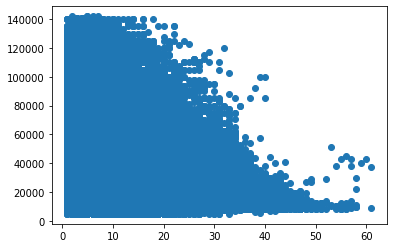

In [198]:
plt.scatter(df1["Age"], df1["SalePrice"])

In [199]:
df1 = df1.loc[:,["SalePrice", "Age"]].copy()

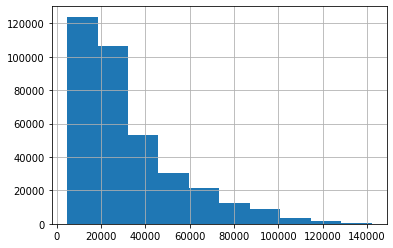

In [200]:
df1.SalePrice.hist()

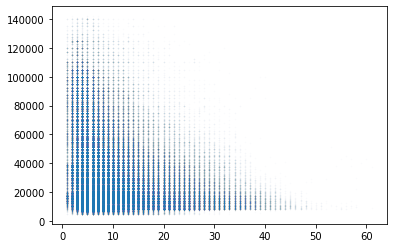

In [201]:
plt.scatter(df1["Age"],df1["SalePrice"], s=1, alpha=0.01)

In [202]:
X = sm.add_constant(df1["Age"])
X

/Users/chulgyukim/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Age
0,1.0,2
1,1.0,8
2,1.0,3
3,1.0,10
4,1.0,2
...,...,...
401120,1.0,6
401121,1.0,6
401122,1.0,6
401123,1.0,6


In [228]:
#y = df1["SalePrice"]
y_log = np.log(df1["SalePrice"])
y_log

0         11.097410
1         10.950807
2          9.210340
3         10.558414
4          9.305651
            ...    
401120     9.259131
401121     9.305651
401122     9.350102
401123     9.104980
401124     8.955448
Name: SalePrice, Length: 362235, dtype: float64

In [229]:
yearmade_model = sm.OLS(y_log,X)
yearmade_results = yearmade_model.fit()
yearmade_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                 2.384e+04
Date:                Fri, 17 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:02:26   Log-Likelihood:            -3.6831e+05
No. Observations:              362235   AIC:                         7.366e+05
Df Residuals:                  362233   BIC:                         7.366e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.3783      0.002   5496.526      0.000      10.375      10.382
Age           -0.0231      0.000   -154.396      0.000      -0.023      -0.023
==============================================================================
Omnibus:                    10859.004   Durbin-Watson:                   0.449
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5157.311
Skew:                          -0.002   Prob(JB):                         0.00
Kurtosis:                       2.415   Cond. No.                         21.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [230]:
yearmade_results.params

const    10.378336
Age      -0.023087
dtype: float64

In [231]:
const, year = yearmade_results.params

In [232]:
yearmade_results.params

const    10.378336
Age      -0.023087
dtype: float64

Text(0, 0.5, 'Sale Price')

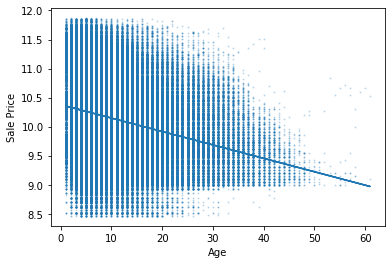

In [234]:
plt.scatter(df1["Age"], np.log(df1["SalePrice"]), s=1, alpha=0.2)
plt.plot(df1["Age"], df1["Age"].map(lambda x: (year*x)+const))
plt.xlabel("Age")
plt.ylabel("Sale Price")

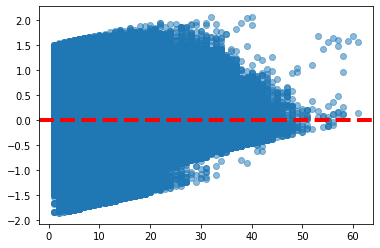

In [235]:
plt.scatter(df1["Age"], yearmade_results.resid, alpha=0.5)
plt.axhline(0,color='red', linewidth=4, linestyle='--')

In [210]:
def custom_metric(y_test, y_pred):
    return np.sqrt(np.sum((np.log(y_pred+1) - np.log(y_test))**2)/len(y_test))

In [236]:
df2 = df[(df["YearMade"] < 1940) & (df["YearMade"] != 1000)]

In [237]:
df2["YearMade"]

31522     1919
35177     1919
36968     1920
43497     1919
43991     1919
          ... 
251263    1919
252878    1920
256079    1920
256111    1920
258422    1920
Name: YearMade, Length: 145, dtype: int64

In [238]:
df2["Age"] = (df2["saledate"].map(lambda x: int(x.split(" ")[0][-4:])))-df2["YearMade"]

/Users/chulgyukim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [239]:
df2 = df2[["SalePrice", "Age"]]

In [240]:
X2 = sm.add_constant(df2["Age"])
X2

,const,Age
31522,1.0,79
35177,1.0,92
36968,1.0,91
43497,1.0,92
43991,1.0,92
...,...,...
251263,1.0,92
252878,1.0,85
256079,1.0,91
256111,1.0,91


In [241]:
#y2 = df2["SalePrice"]
y2_log = np.log(df2["SalePrice"])

In [242]:
yearmade_model2 = sm.OLS(y2_log,X2)
yearmade_results2 = yearmade_model2.fit()
yearmade_results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     9.611
Date:                Fri, 17 Jan 2020   Prob (F-statistic):            0.00233
Time:                        15:04:52   Log-Likelihood:                -84.318
No. Observations:                 145   AIC:                             172.6
Df Residuals:                     143   BIC:                             178.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0806      0.535     15.092      0.000       7.022       9.139
Age            0.0205      0.007      3.100      0.002       0.007       0.034
==============================================================================
Omnibus:                        5.053   Durbin-Watson:                   0.992
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                2.849
Skew:                           0.094   Prob(JB):                        0.241
Kurtosis:                       2.340   Cond. No.                     1.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [245]:
const2, year2 = yearmade_results2.params

Text(0, 0.5, 'Sale Price')

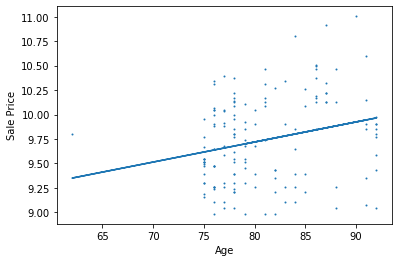

In [246]:
plt.scatter(df2["Age"], np.log(df2["SalePrice"]), s=1)
plt.plot(df2["Age"], df2["Age"].map(lambda x: (year2*x)+const2))
plt.xlabel("Age")
plt.ylabel("Sale Price")

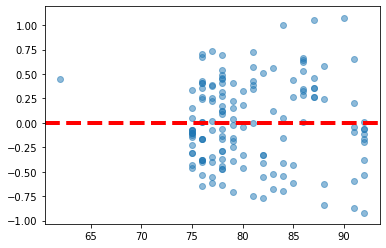

In [247]:
plt.scatter(df2["Age"], yearmade_results2.resid, alpha=0.5)
plt.axhline(0,color='red', linewidth=4, linestyle='--')